In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
wine = load_wine()

print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
df=pd.DataFrame(wine['data'],columns=wine['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


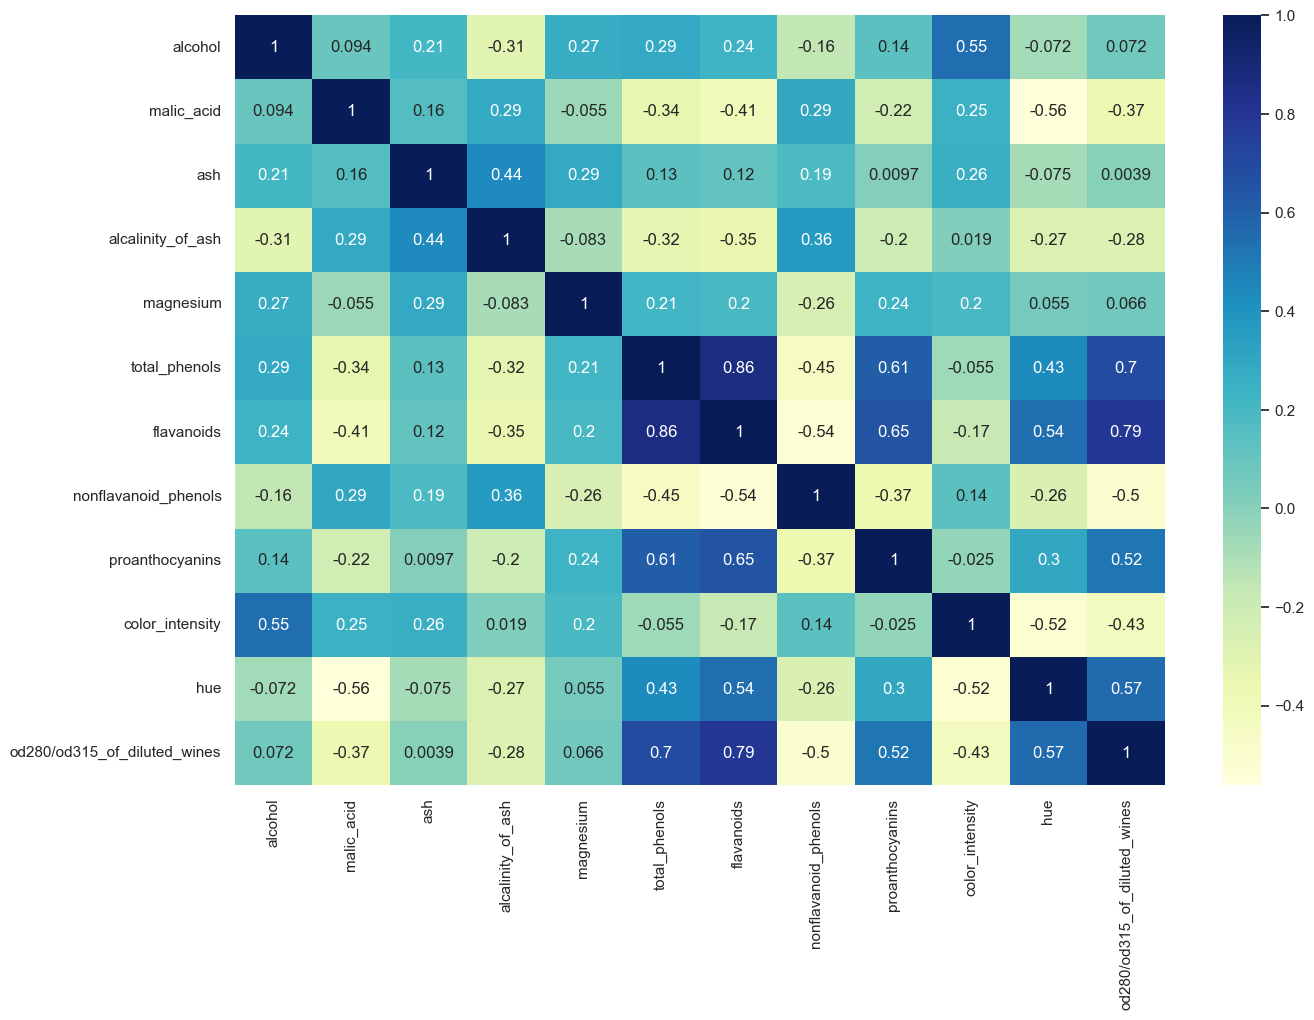

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [8]:
# Standardize the data
def standardize_data(df):
    scaler = (df - df.mean()) / df.std()
    return scaler

scaled_data = standardize_data(df)

In [9]:
# Compute the covariance matrix
def compute_covariance_matrix(data):
    return np.cov(data, rowvar=False)

cov_matrix = compute_covariance_matrix(scaled_data)

# Compute eigenvalues and eigenvectors
def compute_eigen(cov_matrix):
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)  # Use np.linalg.eigh for symmetric matrices
    return eigvals, eigvecs

eigvals, eigvecs = compute_eigen(cov_matrix)

# Sort eigenvalues and eigenvectors
def sort_eigen(eigvals, eigvecs):
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    return eigvals, eigvecs

eigvals, eigvecs = sort_eigen(eigvals, eigvecs)

# Project data onto principal components
def project_data(data, eigvecs, n_components):
    return np.dot(data, eigvecs[:, :n_components])

# Perform PCA with 2 components
x_pca = project_data(scaled_data, eigvecs, 2)

In [10]:
scaled_data.shape

(178, 13)

In [11]:
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second principle component')

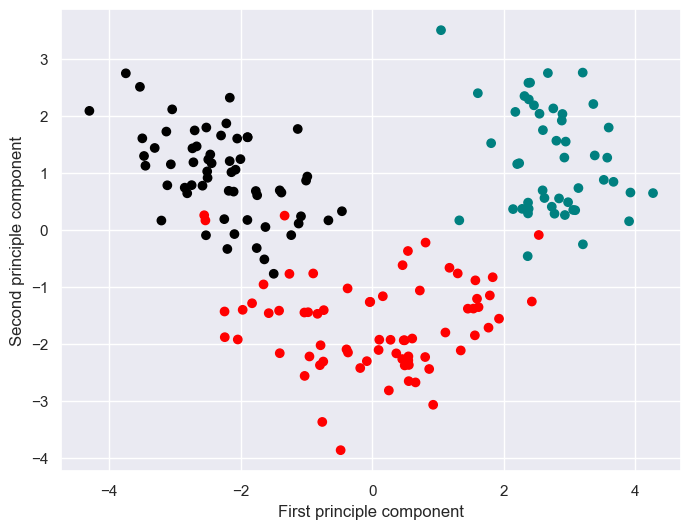

In [14]:
plt.figure(figsize=(8,6))
pc1 = x_pca[:,0]
pc2 = x_pca[:,1]
colors = np.array(["black", "red", "teal"])
plt.scatter(pc1, pc2, c=colors[wine['target']])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [15]:
# Explained variance ratio
explained_variance_ratio = eigvals / np.sum(eigvals)
print('Explained variance ratio for 2 components:', explained_variance_ratio[:2])

Explained variance ratio for 2 components: [0.36198848 0.1920749 ]


In [18]:
# Perform PCA with 3 components
principal_components = project_data(scaled_data, eigvecs, 3)
new_X = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
new_X.head()

,PC1,PC2,PC3
0,-3.307421,1.439402,0.165273
1,-2.203250,-0.332455,2.020757
2,-2.509661,1.028251,-0.980054
3,-3.746497,2.748618,0.175696
4,-1.006070,0.867384,-2.020987


Explained variance ratio for 3 components: [36.2 19.2 11.1  7.1  6.6  4.9  4.2  2.7  2.2  1.9  1.7  1.3  0.8]


Text(0.5, 1.0, 'Scree Plot')

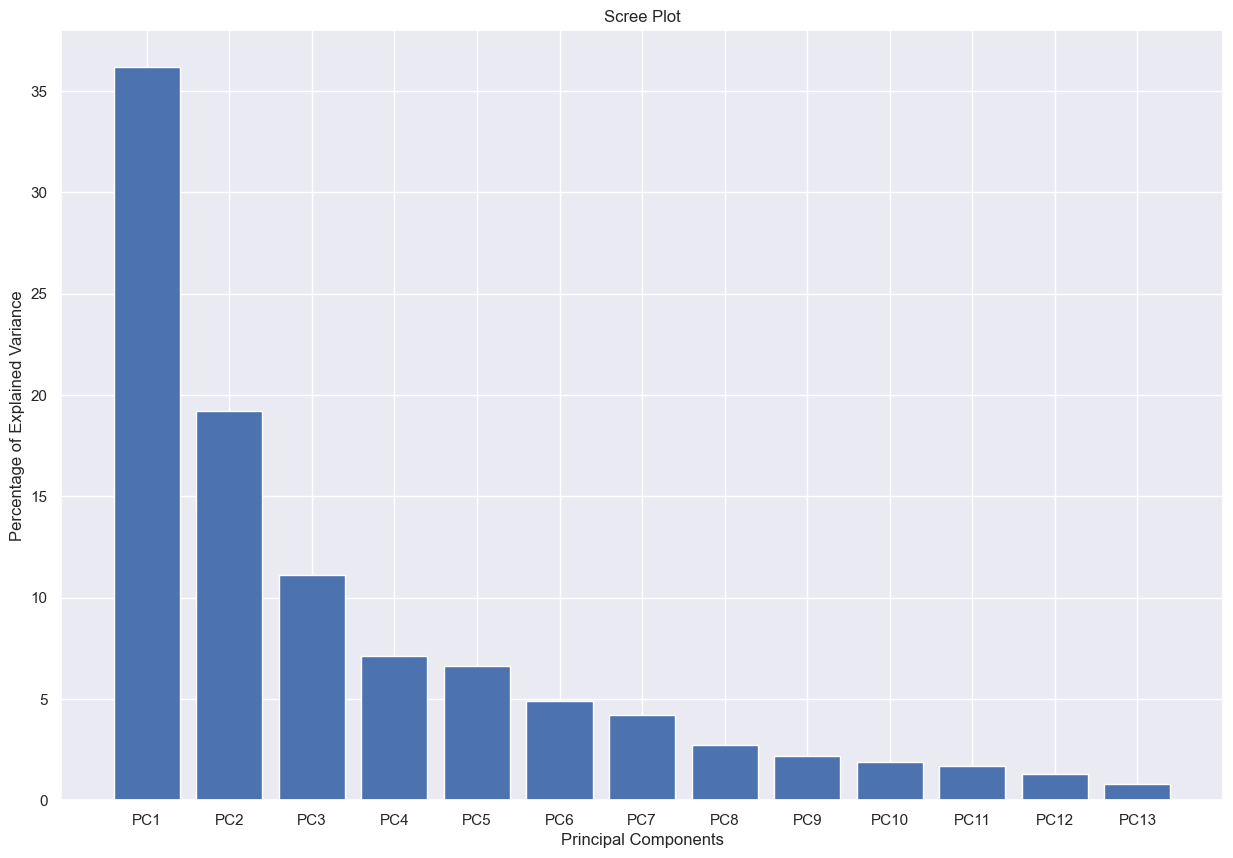

In [19]:
per_var = np.round(explained_variance_ratio * 100, decimals=1)
print('Explained variance ratio for 3 components:', per_var)

# Scree plot
label = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=label)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')

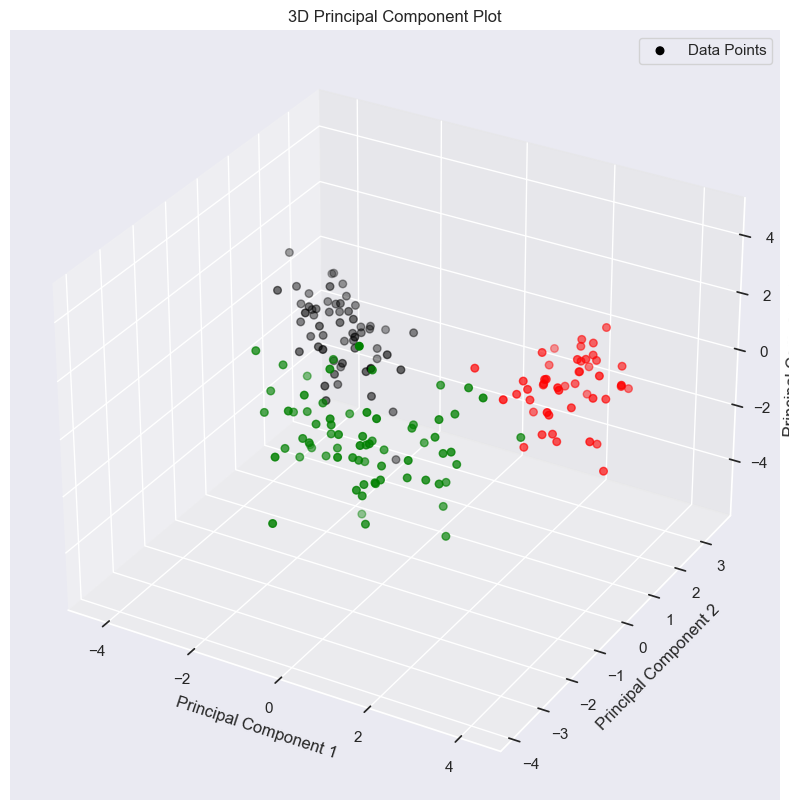

In [20]:
# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

colors = np.array(["black", "green", "red"])

# Plotting the data points in the new 3D space
ax.scatter(pc1, pc2, pc3, c=colors[wine['target']], marker='o', s=30, label='Data Points')

# Customize the plot with labels and a legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Principal Component Plot')
ax.legend()

plt.show()